In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

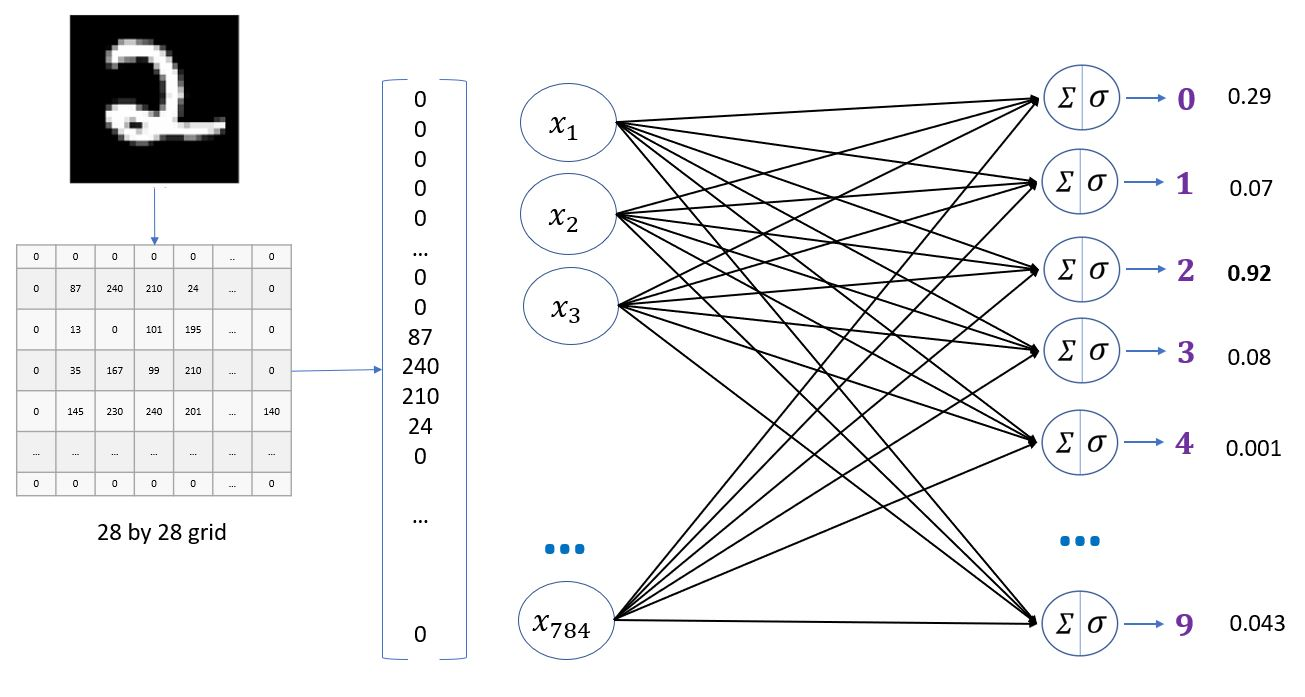


In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
# Dividing by 255 because we are scaling. This improves the models prediction accuracy. Without this acc = 0.45 and later its 0.92(after scaling)

x_train = x_train / 255
len(x_train)

60000

In [17]:
x_test = x_test / 255
len(x_test)

10000

In [18]:
x_train[0].shape

(28, 28)

In [19]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<Figure size 640x480 with 0 Axes>

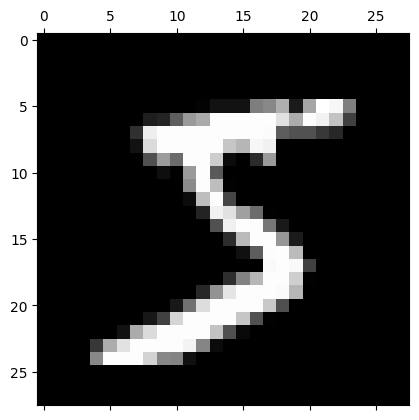

In [20]:
plt.gray()
plt.matshow(x_train[0])

In [21]:
print(y_train[0])

5


In [22]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
x_train_flattened.shape

(60000, 784)

In [24]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(784,))
])
                         
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - accuracy: 0.8136 - loss: 0.7322  
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 303us/step - accuracy: 0.9133 - loss: 0.3130
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 288us/step - accuracy: 0.9194 - loss: 0.2890
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 288us/step - accuracy: 0.9239 - loss: 0.2673
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - accuracy: 0.9264 - loss: 0.2682


In [27]:
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [28]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.9136 - loss: 0.3079


[0.272022545337677, 0.9246000051498413]

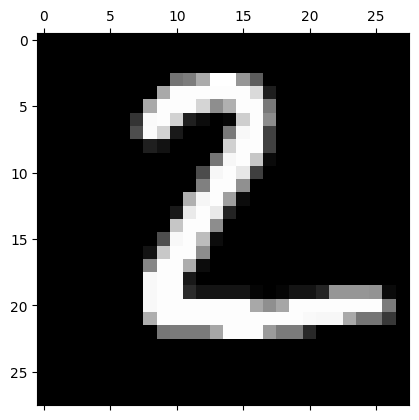

In [37]:
plt.matshow(x_test[1])

In [38]:
y_pred = model.predict(x_test_flattened)
y_pred[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


array([5.8820289e-01, 7.2175651e-03, 9.9932760e-01, 3.9790621e-01,
       5.4999416e-10, 8.6678201e-01, 8.7334716e-01, 9.2947297e-13,
       1.8295105e-01, 4.0867905e-09], dtype=float32)

In [40]:
print(f'Predicted: {np.argmax(y_pred[1])}')

Predicted: 2


In [41]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [42]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [43]:
conf_mat = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    1,    0,    5,    2,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    2,    4,    2,   10,    0],
       [   7,   10,  916,   15,    6,    5,   13,   10,   45,    5],
       [   5,    0,   18,  899,    0,   41,    2,   11,   25,    9],
       [   2,    1,    6,    1,  898,    0,    9,    6,   11,   48],
       [  10,    2,    2,   18,    6,  802,   11,    5,   29,    7],
       [  17,    3,    6,    0,    7,   21,  899,    2,    3,    0],
       [   2,    5,   21,    5,    4,    0,    0,  954,    6,   31],
       [   7,    7,    5,   13,    9,   33,    8,   11,  869,   12],
       [  11,    7,    1,    7,   14,   10,    0,   25,    5,  929]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

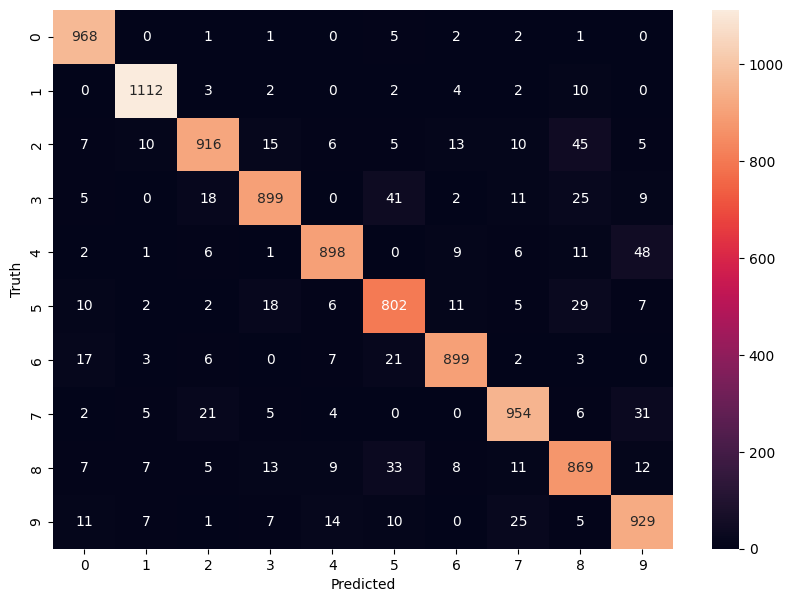

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
                         
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.8743 - loss: 0.4527  
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.9628 - loss: 0.1284
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.9752 - loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.9809 - loss: 0.0648
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.9855 - loss: 0.0480


In [49]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.9722 - loss: 0.0923


[0.07963337004184723, 0.977400004863739]

In [51]:
y_pred = model.predict(x_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step


In [52]:
conf_mat = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)

Text(95.72222222222221, 0.5, 'Truth')

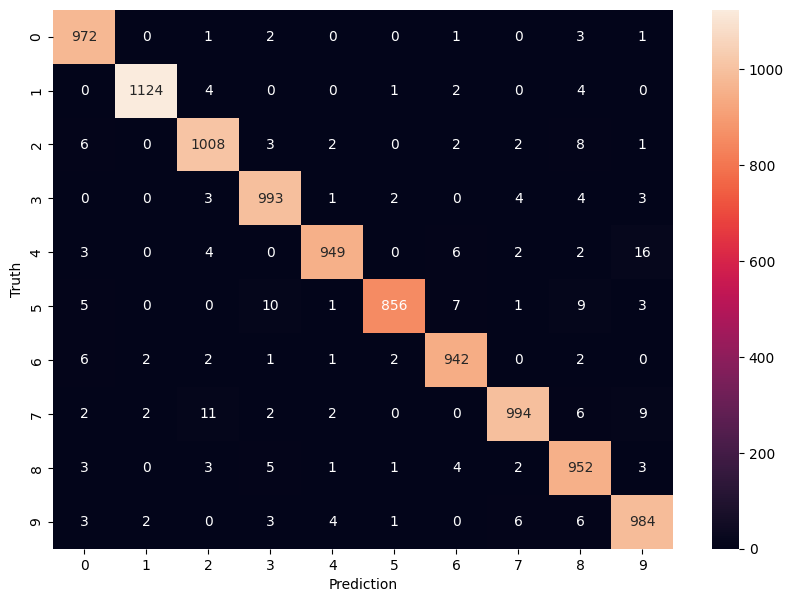

In [53]:
plt.figure(figsize = (10,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [56]:
# Can use flatten in model itself

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
                         
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.8719 - loss: 0.4608  
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.9605 - loss: 0.1322
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.9755 - loss: 0.0858
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.9801 - loss: 0.0643
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.9845 - loss: 0.0501
